In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import pandas as pd
df=pd.read_csv("water_dataset.csv")
df

/var/folders/dm/y9gb87h50r92ywnr3t0yxkhc0000gn/T/ipykernel_20741/1040169342.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,rural_or_urban,State Name,District Name,Block/Tehsil Name,Village Name,si_no_of_water_body_within_village_town,unique_id,water_body_name,basin_name,sub_basin_name,...,manmade_water_body_type_name,water_spread_area_of_water_body,max_depth_water_body_fully_filled,storage_capacity_water_body_original,storage_capacity_water_body_present,filled_up_storage_name,filled_up_storage_space_name,no_town_cities_benefited,no_villages_benefited,no_people_benefited_by_water_body
0,Rural,SIKKIM,SOUTH SIKKIM,DEYTHANG,UPPER DEYTHANG,1,1/23/003/000040/000001/001,Cho Cho Lake Ravangla,Brahmaputra Basin,Brahmaputra Lower,...,NaN,0.130,2.0,2700.0,1755.0,Upto 3/4,Filled up every year,1.0,1.0,100.0
1,Rural,SIKKIM,WEST SIKKIM,RIBDI,UPPER RIBDI,1,1/23/004/000078/000003/001,Smiriti Ban Upper Ribdi,Brahmaputra Basin,Brahmaputra Lower,...,NaN,0.033,1.0,334.0,69.0,Upto 1/4,Rarely filled up,NaN,NaN,NaN
2,Rural,SIKKIM,EAST SIKKIM,CHADEY,SUBITHANG,1,1/23/001/000101/000002/001,NIMA ONGDUP BHUTIA POND,Brahmaputra Basin,Brahmaputra Lower,...,Concrete,0.001,1.0,7.0,7.0,Full,Filled up every year,0.0,1.0,20.0
3,Rural,SIKKIM,EAST SIKKIM,DUNG DUNG,DUNG DUNG,1,1/23/001/000058/000003/001,DUNG DUNG FISH POND G PRADHAN,Brahmaputra Basin,Brahmaputra Lower,...,Concrete,0.011,2.0,230.0,229.0,Full,Filled up every year,0.0,3.0,150.0
4,Rural,SIKKIM,EAST SIKKIM,LINGTAM,BOUCHEN,1,1/23/001/000014/000001/001,QUE KHOLA POND,Brahmaputra Basin,Brahmaputra Lower,...,NaN,0.015,1.0,149.0,149.0,Full,Filled up every year,0.0,3.0,150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96751,Rural,JAMMU & KASHMIR,KATHUA,BILAWAR,BHADDU,11,1/10/009/000002/000007/011,BHADWAL BOWLI,NaN,NaN,...,Concrete,0.001,3.0,NaN,NaN,NaN,NaN,0.0,1.0,10.0
96752,Rural,JAMMU & KASHMIR,KATHUA,BILAWAR,BHADDU,12,1/10/009/000002/000007/012,NEAR HOUSE OF MOHD IQBAL MIR,NaN,NaN,...,Concrete,0.001,2.0,NaN,NaN,NaN,NaN,0.0,1.0,12.0
96753,Rural,JAMMU & KASHMIR,KATHUA,BILAWAR,BAGGAN,3,1/10/009/000002/000027/003,RODLA MOHALLA,NaN,NaN,...,Others,0.002,2.0,200.0,200.0,Nil/Negligible filled up,Never filled up,NaN,NaN,NaN
96754,Rural,JAMMU & KASHMIR,KUPWARA,RAMHAL,DAHAMA,1,1/10/012/000007/000017/001,NaN,NaN,NaN,...,Concrete,0.001,1.0,20.0,20.0,Upto 1/2,Never filled up,0.0,1.0,200.0


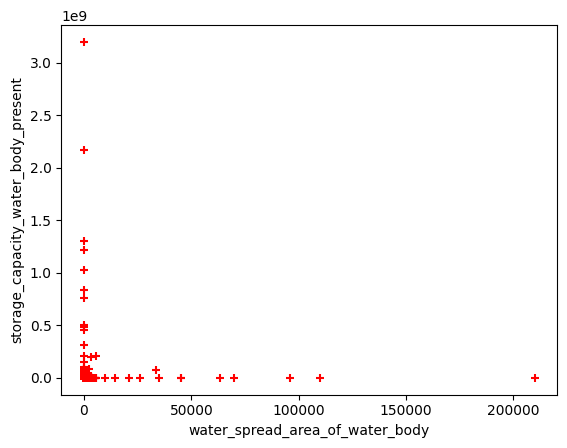

In [2]:
%matplotlib inline
plt.xlabel('water_spread_area_of_water_body')
plt.ylabel('storage_capacity_water_body_present')
plt.scatter(df.water_spread_area_of_water_body,df.storage_capacity_water_body_present,color='red',marker='+')

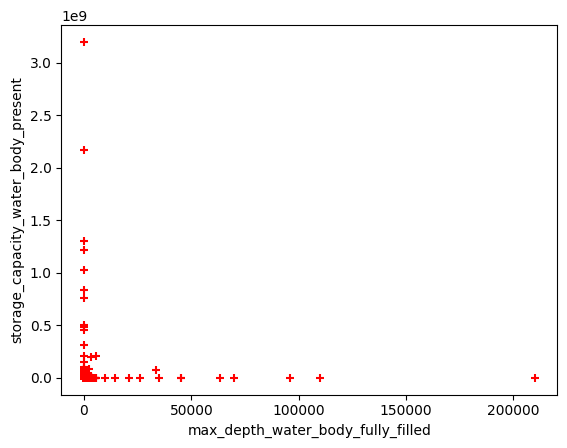

In [3]:
%matplotlib inline
plt.xlabel('max_depth_water_body_fully_filled')
plt.ylabel('storage_capacity_water_body_present')
plt.scatter(df.water_spread_area_of_water_body,df.storage_capacity_water_body_present,color='red',marker='+')

In [4]:
X=df[['max_depth_water_body_fully_filled','water_spread_area_of_water_body']]
Y=df[['storage_capacity_water_body_present']]
X

,max_depth_water_body_fully_filled,water_spread_area_of_water_body
0,2.0,0.130
1,1.0,0.033
2,1.0,0.001
3,2.0,0.011
4,1.0,0.015
...,...,...
96751,3.0,0.001
96752,2.0,0.001
96753,2.0,0.002
96754,1.0,0.001


In [5]:
X.fillna(0, inplace=True)
Y.fillna(0, inplace=True)
Y

/var/folders/dm/y9gb87h50r92ywnr3t0yxkhc0000gn/T/ipykernel_20741/1762661006.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)
/var/folders/dm/y9gb87h50r92ywnr3t0yxkhc0000gn/T/ipykernel_20741/1762661006.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y.fillna(0, inplace=True)


,storage_capacity_water_body_present
0,1755.0
1,69.0
2,7.0
3,229.0
4,149.0
...,...
96751,0.0
96752,0.0
96753,200.0
96754,20.0


In [6]:
reg= linear_model.LinearRegression()
reg.fit(X[['max_depth_water_body_fully_filled','water_spread_area_of_water_body']],Y.storage_capacity_water_body_present)
reg.fit(X,Y)

LinearRegression()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Assuming your features are in 'X' and target variable is in 'y'

# Split data into training and testing sets (optional, but recommended for evaluation)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create the linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)
model.fit(X, Y)


# (Optional) Make predictions on the testing set (for evaluation)
y_pred = model.predict(X_test)


In [8]:
reg.predict([[2.0,0.130]])

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[152503.59261748]])

In [9]:
reg.coef_

array([[19037.75105135,    27.80529998]])

In [10]:
reg.intercept_

array([114424.47582578])

In [11]:
reg.predict([[2.0,0.130]])

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[152503.59261748]])

In [12]:
x=X.max_depth_water_body_fully_filled	
y=Y.storage_capacity_water_body_present
x = x.to_frame().T  # Transpose to make it a single row DataFrame
y = y.to_frame().T  # Transpose to make it a single row DataFrame
x

,0,1,2,3,4,5,6,7,8,9,...,96746,96747,96748,96749,96750,96751,96752,96753,96754,96755
max_depth_water_body_fully_filled,2.0,1.0,1.0,2.0,1.0,3.0,2.0,2.0,4.0,2.0,...,2.0,1.0,2.0,1.0,1.0,3.0,2.0,2.0,1.0,1.0


In [13]:
from sklearn.preprocessing import LabelEncoder
le_depth = LabelEncoder()
le_water = LabelEncoder()
le_storage= LabelEncoder()
X['max_depth_water_body_fully_filled'] = le_depth.fit_transform(X['max_depth_water_body_fully_filled'])
X['water_spread_area_of_water_body'] = le_water.fit_transform(X['water_spread_area_of_water_body'])
Y['storage_capacity_water_body_present'] = le_storage.fit_transform(Y['storage_capacity_water_body_present'])
Y

/var/folders/dm/y9gb87h50r92ywnr3t0yxkhc0000gn/T/ipykernel_20741/1929288126.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['max_depth_water_body_fully_filled'] = le_depth.fit_transform(X['max_depth_water_body_fully_filled'])
/var/folders/dm/y9gb87h50r92ywnr3t0yxkhc0000gn/T/ipykernel_20741/1929288126.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['water_spread_area_of_water_body'] = le_water.fit_transform(X['water_spread_area_of_water_body'])
/var/folders/dm/y9gb87h50r92ywnr3t0yxkhc0000gn/T/ipy

,storage_capacity_water_body_present
0,1341
1,68
2,7
3,225
4,147
...,...
96751,0
96752,0
96753,197
96754,20


In [14]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X,Y)

DecisionTreeClassifier()

In [15]:
model.score(X,Y)

0.39993385423126215

In [16]:
model.predict([[1.0,0.001]])

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)
model.fit(X_train, y_train)

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_estimators=10)

In [18]:
model.score(X_test, y_test)

0.3033278214138074

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize and train the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = gbr.predict(X_test)
y_pred


/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


array([ 796.9707772 , 1733.59866571, 1591.27875919, ..., 2175.82231587,
        486.11776437, 2016.52067691])

Feature Importances: [0.42937533 0.57062467]


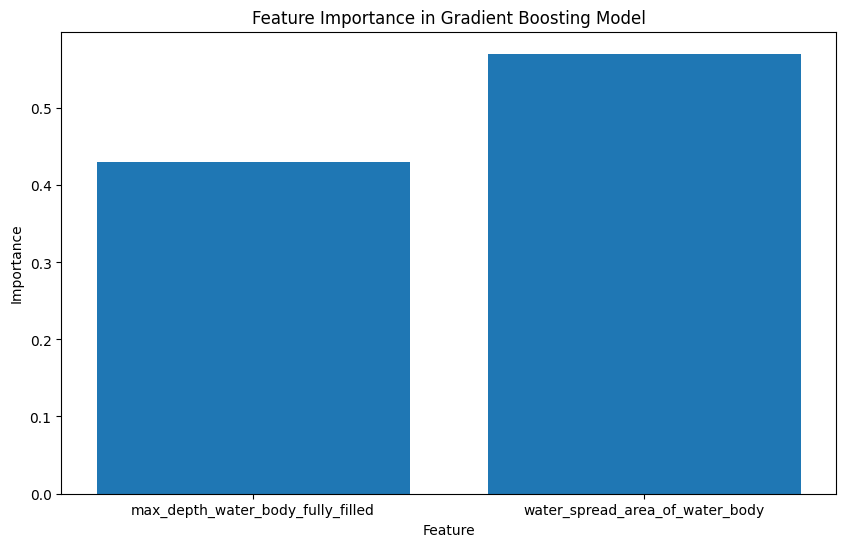

In [20]:
# Assuming your trained model is named 'gbr'
feature_importances = gbr.feature_importances_

# Print feature importances or create a bar chart for visualization
print("Feature Importances:", feature_importances)

# Example bar chart using matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance in Gradient Boosting Model')
plt.show()


In [21]:

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1458285.378987996


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error



# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize and train the MLPRegressor
mlp_regressor = MLPRegressor(random_state=42)
mlp_regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = mlp_regressor.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error: 2027028.4836583636


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [23]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
 
# Initializing the Decision Tree Regressor model
tree_regressor = DecisionTreeRegressor(random_state=42)

# Fitting the model on the training data
tree_regressor.fit(X_train, y_train)

# Predicting on the test data
y_pred = tree_regressor.predict(X_test)

# Calculating Mean Squared Error (MSE) as a performance metric
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)



Mean Squared Error: 1708133.949035321


[Text(0.5, 0.9, '1362.0 <= 1.5\nsquared_error = 2501434.449\nsamples = 77404\nvalue = 1115.733'),
 Text(0.25, 0.7, '1705.7881773399015 <= 861.5\nsquared_error = 961291.666\nsamples = 33370\nvalue = 459.361'),
 Text(0.125, 0.5, '1705.7881773399015 <= 859.5\nsquared_error = 834421.061\nsamples = 32202\nvalue = 428.331'),
 Text(0.0625, 0.3, '1705.7881773399015 <= 100.5\nsquared_error = 979278.918\nsamples = 23690\nvalue = 530.694'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, '1362.0 <= 0.5\nsquared_error = 320938.684\nsamples = 8512\nvalue = 143.441'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, '1705.7881773399015 <= 3300.0\nsquared_error = 3700705.745\nsamples = 1168\nvalue = 1314.866'),
 Text(0.3125, 0.3, '1705.7881773399015 <= 2673.5\nsquared_error = 3596843.216\nsamples = 1152\nvalue = 1286.024'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (...)  \n'),
 Text(0.437

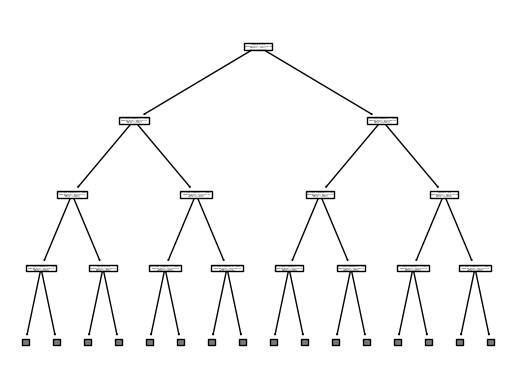

In [24]:
from sklearn.tree import plot_tree

# Assuming your model is named 'tree_regressor' and feature names are in 'feature_names' list
plot_tree(tree_regressor, max_depth=3, feature_names=y_pred)

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your data: Replace 'X' and 'y' with your actual feature and target variables
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create the Random Forest Regressor model
rf_regressor = RandomForestRegressor(random_state=42)

# Train the model on the training data
rf_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_regressor.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)




/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Squared Error: 1530178.1249296544


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


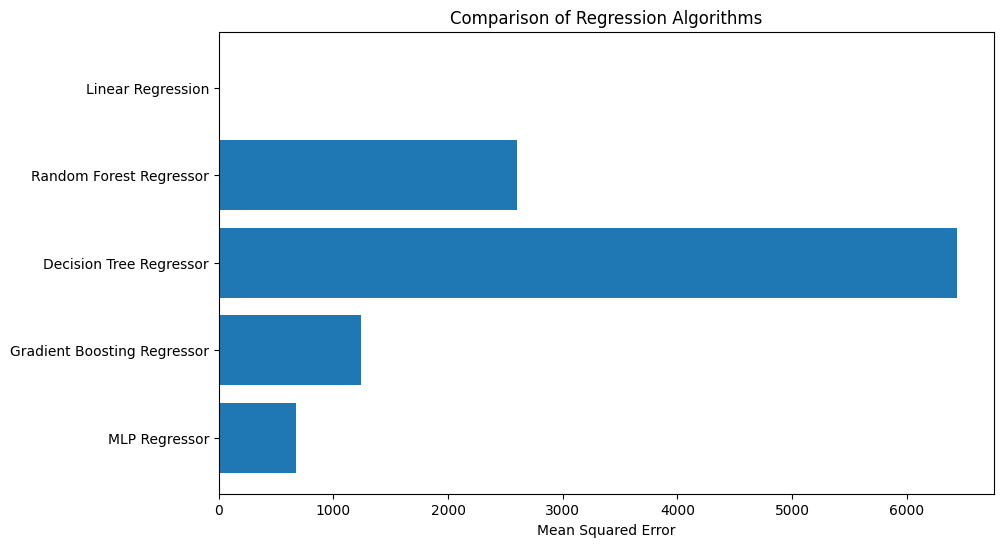

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Generate synthetic dataset
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
    "MLP Regressor": MLPRegressor(random_state=42)
}

# Train and evaluate each model
mse_scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores[name] = mse

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(range(len(mse_scores)), list(mse_scores.values()), align='center')
plt.yticks(range(len(mse_scores)), list(mse_scores.keys()))
plt.xlabel('Mean Squared Error')
plt.title('Comparison of Regression Algorithms')
plt.gca().invert_yaxis()  # Invert y-axis to have the best model on top
plt.show()


In [29]:
# Feature Importance Visualization (similar to Random Forest Classifier)
feature_importances = rf_regressor.feature_importances_
plt.figure(figsize=(14, 4))
plt.bar(X.columns, feature_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance in Random Forest Regressor')
plt.show()

# Partial Dependence Plots (for understanding individual feature effect on prediction)
from sklearn.inspection import partial_dependence



AttributeError: 'numpy.ndarray' object has no attribute 'columns'

<Figure size 1400x400 with 0 Axes>

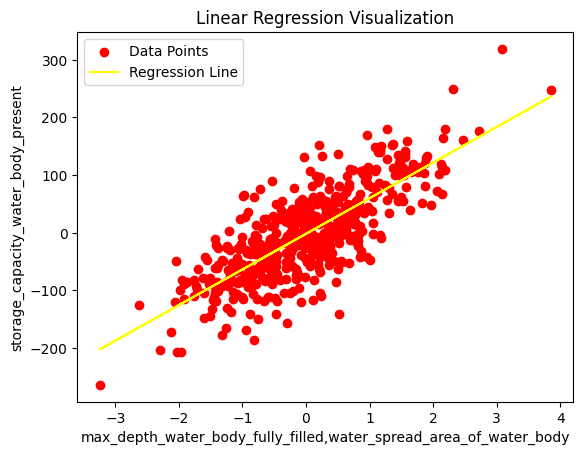

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

# Generate random linear data
X, Y = make_regression(n_samples=500, n_features=1, noise=50, random_state=42)

# Fit linear regression model
model = LinearRegression()
model.fit(X, Y)

# Plot data points
plt.scatter(X, Y, color='red', label='Data Points')

# Plot the regression line
plt.plot(X, model.predict(X), color='yellow', label='Regression Line')

# Add labels and title
plt.xlabel('max_depth_water_body_fully_filled,water_spread_area_of_water_body')
plt.ylabel('storage_capacity_water_body_present')
plt.title('Linear Regression Visualization')

# Add legend
plt.legend()

# Show plot
plt.show()


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


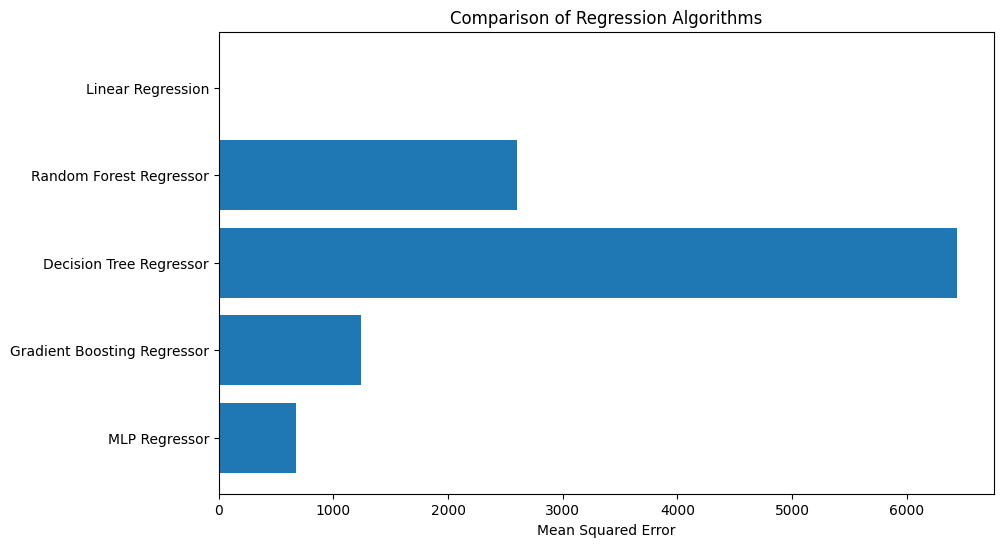

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Generate synthetic dataset
X, Y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
    "MLP Regressor": MLPRegressor(random_state=42)
}

# Train and evaluate each model
mse_scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores[name] = mse

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(range(len(mse_scores)), list(mse_scores.values()), align='center')
plt.yticks(range(len(mse_scores)), list(mse_scores.keys()))
plt.xlabel('Mean Squared Error')
plt.title('Comparison of Regression Algorithms')
plt.gca().invert_yaxis()  # Invert y-axis to have the best model on top
plt.show()


In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import accuracy_score, f1_score, recall_score

# Generate synthetic dataset
X, Y = make_regression(n_samples=1000, n_features=20, noise=0.2, random_state=30)

# Discretize the target variable into bins
est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
y_bins = est.fit_transform(y.reshape(-1, 1)).flatten()

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_bins, test_size=0.2, random_state=30)

# Initialize and train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Convert predictions to discrete values
y_pred_discrete = est.transform(y_pred.reshape(-1, 1)).flatten()

# Calculate classification metrics
accuracy = accuracy_score(y_test, y_pred_discrete)
f1 = f1_score(y_test, y_pred_discrete, average='weighted')
recall = recall_score(y_test, y_pred_discrete, average='weighted')

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)


Accuracy: 0.465
F1 Score: 0.2951877133105802
Recall: 0.465


/opt/homebrew/lib/python3.11/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Generate synthetic dataset
X, Y = make_regression(n_samples=1000, n_features=20, noise=0.2, random_state=30)

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=30)

# Initialize Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=30)

# Train the model
rf_regressor.fit(X_train, y_train)

# Predict on test set
y_pred = rf_regressor.predict(X_test)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


Mean Squared Error: 7693.934674062612
Mean Absolute Error: 69.44871400317096
R-squared: 0.8036015392048713


In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import accuracy_score, f1_score, recall_score

# Generate synthetic dataset
X, Y = make_regression(n_samples=1000, n_features=20, noise=0.2, random_state=30)

# Discretize the target variable into bins
est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
y_bins = est.fit_transform(Y.reshape(-1, 1)).flatten()

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_bins, test_size=0.2, random_state=30)

# Initialize and train Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=30)
dt_regressor.fit(X_train, y_train)

# Predict on test set
y_pred = dt_regressor.predict(X_test)

# Convert predictions to discrete values
y_pred_discrete = est.transform(y_pred.reshape(-1, 1)).flatten()

# Calculate classification metrics
accuracy = accuracy_score(y_test, y_pred_discrete)
f1 = f1_score(y_test, y_pred_discrete, average='weighted')
recall = recall_score(y_test, y_pred_discrete, average='weighted')

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)


Accuracy: 0.46
F1 Score: 0.2898630136986301
Recall: 0.46


/opt/homebrew/lib/python3.11/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Generate synthetic dataset
X, Y = make_regression(n_samples=1000, n_features=20, noise=0.2, random_state=30)

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=30)

# Initialize MLP Regressor
mlp_regressor = MLPRegressor(random_state=30)

# Train the model
mlp_regressor.fit(X_train, y_train)

# Predict on test set
y_pred = mlp_regressor.predict(X_test)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


Mean Squared Error: 2601.981770375312
Mean Absolute Error: 39.13545678646138
R-squared: 0.9335807702603147


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Generate synthetic dataset
X, Y = make_regression(n_samples=1000, n_features=20, noise=0.2, random_state=30)

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=30)

# Initialize Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(random_state=30)

# Train the model
gb_regressor.fit(X_train, y_train)

# Predict on test set
y_pred = gb_regressor.predict(X_test)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


Mean Squared Error: 3278.4306174143894
Mean Absolute Error: 43.53350073946508
R-squared: 0.9163134658194565
